# 1. Import and Install Dependencies

In [ ]:
# !pip install tensorflow==2.7.1 tensorflow-gpu==2.7.1 opencv-python==4.5.5.64 mediapipe==0.10.5 scikit-learn==0.24.2 numpy==1.19.5 matplotlib       

: 

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):

    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=1, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=1, circle_radius=1)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=1, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=1, circle_radius=1)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=1, circle_radius=2), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=1, circle_radius=1)
                             ) 

In [6]:
cap = cv2.VideoCapture(1) ### chage to your device usually 0
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        # print(frame.shape)
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        # print(results)
        
        # # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

# draw_landmarks(frame, results)

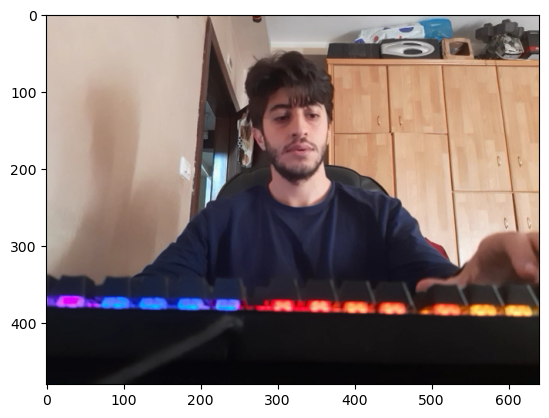

In [7]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [8]:
results.left_hand_landmarks

In [9]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

NameError: name 'results' is not defined

In [10]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [12]:
result_test = extract_keypoints(results)

In [13]:
result_test

array([ 5.12851536e-01,  3.16097945e-01, -6.33724809e-01,  9.99728799e-01,
        5.24606764e-01,  2.72069573e-01, -6.01430714e-01,  9.99323964e-01,
        5.34872651e-01,  2.70170569e-01, -6.01292431e-01,  9.99531507e-01,
        5.45518398e-01,  2.69310623e-01, -6.01589382e-01,  9.99438226e-01,
        4.87252951e-01,  2.80644238e-01, -5.96559763e-01,  9.99288559e-01,
        4.72707659e-01,  2.84163058e-01, -5.95999539e-01,  9.99292314e-01,
        4.59435463e-01,  2.87604928e-01, -5.96133888e-01,  9.98856425e-01,
        5.57585299e-01,  2.82257527e-01, -3.76258075e-01,  9.99540508e-01,
        4.43624020e-01,  2.99906105e-01, -3.44559640e-01,  9.99401569e-01,
        5.37571728e-01,  3.54737371e-01, -5.52810311e-01,  9.99758959e-01,
        4.94060457e-01,  3.68423939e-01, -5.42221904e-01,  9.99697685e-01,
        6.57153785e-01,  4.99113560e-01, -2.48269394e-01,  9.99766350e-01,
        3.78963888e-01,  5.15778244e-01, -2.29517788e-01,  9.99553859e-01,
        7.86692023e-01,  

In [14]:
np.save('0', result_test)

In [15]:
np.load('0.npy')

array([ 5.12851536e-01,  3.16097945e-01, -6.33724809e-01,  9.99728799e-01,
        5.24606764e-01,  2.72069573e-01, -6.01430714e-01,  9.99323964e-01,
        5.34872651e-01,  2.70170569e-01, -6.01292431e-01,  9.99531507e-01,
        5.45518398e-01,  2.69310623e-01, -6.01589382e-01,  9.99438226e-01,
        4.87252951e-01,  2.80644238e-01, -5.96559763e-01,  9.99288559e-01,
        4.72707659e-01,  2.84163058e-01, -5.95999539e-01,  9.99292314e-01,
        4.59435463e-01,  2.87604928e-01, -5.96133888e-01,  9.98856425e-01,
        5.57585299e-01,  2.82257527e-01, -3.76258075e-01,  9.99540508e-01,
        4.43624020e-01,  2.99906105e-01, -3.44559640e-01,  9.99401569e-01,
        5.37571728e-01,  3.54737371e-01, -5.52810311e-01,  9.99758959e-01,
        4.94060457e-01,  3.68423939e-01, -5.42221904e-01,  9.99697685e-01,
        6.57153785e-01,  4.99113560e-01, -2.48269394e-01,  9.99766350e-01,
        3.78963888e-01,  5.15778244e-01, -2.29517788e-01,  9.99553859e-01,
        7.86692023e-01,  

# 4. Setup Folders for Collection

In [7]:
# Path for exported data, numpy arrays
from pathlib import Path
DATA_PATH = Path(r'MP_Data') ### change your path

# Actions that we try to detect
actions = np.array(['null','besm allah' , 'alsalam alekom' , 'alekom salam' , 'aslan w shlan' , 'me',
                    'age','alhamdulilah' , 'bad' , 'how are you' , 'friend' ,
                    'good' , 'happy' , 'you' , 'my name is' , 'no' , 
                    'or' , 'taaban' , 'what' , 'where' , 'yes' ,
                    'look' , 'said' , 'walking' , 'did not hear' , 'remind me',
                    'eat' , 'bayt' , 'hospital' , 'run' , 'sleep',
                    'think' , 'tomorrow' , 'yesterday' , 'today' , 'when',
                    'dhuhr' , 'sabah' , 'university' , 'kuliyah' ,'night',
                    'a3ooth bellah' , 'danger' , 'enough' , 'hot' , 'mosque' , 'surprise' , 'tard' , 
                    'big' , 'clean' , 'dirty' , 'fire' , 'give me' , 'sho dakhalak' , 'small' , 
                    'help' , 'same' , 'hour' , 'important' , 'ok' , 'please' , 'want' ,
                    'riyadah' , 'sallah' , 'telephone' , 'hamam' , 'water' , 'eid'
                   ])

# actions = np.array(['null','big' , 'clean' , 'dirty' , 'fire' , 'give me' , 'sho dakhalak' , 'small' ])


# Thirty videos worth of data
no_sequences = 60

# Videos are going to be 30 frames in length
sequence_length = 45

# Folder start
start_folder = 0

In [9]:
for action in actions: 
    
    for sequence in range(start_folder,no_sequences+1):
        try: 
            os.makedirs(Path.joinpath(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [47]:
cap = cv2.VideoCapture(0) ### chage to your device usually 0
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences + 1):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(3000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = Path.joinpath(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

        cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        cv2.waitKey(3000)
    cap.release()
    cv2.destroyAllWindows()


I0000 00:00:1736345292.780685   65453 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M3
W0000 00:00:1736345292.828325  189157 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1736345292.842201  189156 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1736345292.843696  189155 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1736345292.843698  189160 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1736345292.843727  189159 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

In [44]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [13]:
label_map = {label:num for num, label in enumerate(actions)}

In [14]:
label_map

{'null': 0,
 'big': 1,
 'clean': 2,
 'dirty': 3,
 'fire': 4,
 'give me': 5,
 'sho dakhalak': 6,
 'small': 7}

In [35]:
def normalize_landmarks(landmarks, epsilon=1e-6):
    num_points = len(landmarks) // 3
    landmarks = landmarks.reshape(num_points, 3)

    # Use wrist as anchor for hands and midpoint of hips for pose
    if num_points == 33:  # Pose
        anchor = landmarks[23]  # Left hip
        reference_dist = np.linalg.norm(landmarks[11] - landmarks[12])  # Shoulder width
    elif num_points == 21:  # Hands
        anchor = landmarks[0]  # Wrist
        reference_dist = np.linalg.norm(landmarks[5] - landmarks[17])  # Palm width
    else:
        return landmarks.flatten()  # Return unchanged for unexpected data

    # Handle potential zero or small reference distance
    if reference_dist < epsilon:
        return np.zeros_like(landmarks.flatten())  # Return zeroed-out array for invalid frames

    # Translate (center around anchor)
    landmarks -= anchor

    # Scale (normalize distances)
    landmarks /= reference_dist

    return landmarks.flatten()


sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))):
        try:
            sequence = sequence.astype(int)
            window = []
            for frame_num in range(sequence_length):
                res = np.load(os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}.npy"))
                normalized_res = np.concatenate([
                    normalize_landmarks(res[:33*4]),  # Pose landmarks
                    normalize_landmarks(res[33*4:33*4 + 21*3]),  # Left hand landmarks
                    normalize_landmarks(res[33*4 + 21*3:])  # Right hand landmarks
                ])
                window.append(normalized_res)
            sequences.append(window)
            labels.append(label_map[action])
        except Exception as e:
            print(f"Error in sequence {sequence}: {e}")

In [36]:
np.array(sequences).shape

(488, 45, 258)

In [37]:
np.array(labels).shape

(488,)

In [38]:
X = np.array(sequences)

In [39]:
X.shape

(488, 45, 258)

In [23]:
y = to_categorical(labels).astype(int)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [42]:
y_test.shape

(74, 8)

# 7. Build and Train LSTM Neural Network

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [26]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [10]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(45,258)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(256, return_sequences=True, activation='tanh'))
model.add(LSTM(128, return_sequences=False, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [20]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [61]:
model.fit(X_train, y_train, epochs=30, callbacks=[tb_callback])

Epoch 1/30
13/13 [==============================] - 5s 90ms/step - loss: 1.0284 - categorical_accuracy: 0.6691
Epoch 2/30
13/13 [==============================] - 1s 89ms/step - loss: 0.3791 - categorical_accuracy: 0.9010
Epoch 3/30
13/13 [==============================] - 1s 90ms/step - loss: 0.1754 - categorical_accuracy: 0.9710
Epoch 4/30
13/13 [==============================] - 1s 91ms/step - loss: 0.2204 - categorical_accuracy: 0.9493
Epoch 5/30
13/13 [==============================] - 1s 89ms/step - loss: 0.1490 - categorical_accuracy: 0.9662
Epoch 6/30
13/13 [==============================] - 1s 90ms/step - loss: 0.2027 - categorical_accuracy: 0.9541
Epoch 7/30
13/13 [==============================] - 1s 92ms/step - loss: 0.1260 - categorical_accuracy: 0.9783
Epoch 8/30
13/13 [==============================] - 1s 91ms/step - loss: 0.1790 - categorical_accuracy: 0.9589
Epoch 9/30
13/13 [==============================] - 1s 89ms/step - loss: 0.1067 - categorical_accuracy: 0.9807
E

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 45, 64)            82688     
                                                                 
 lstm_12 (LSTM)              (None, 45, 128)           98816     
                                                                 
 lstm_13 (LSTM)              (None, 45, 256)           394240    
                                                                 
 lstm_14 (LSTM)              (None, 128)               197120    
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)               

# 8. Make Predictions

In [63]:
res = model.predict(X_test)

In [64]:
actions[np.argmax(res[0])]

'small'

In [65]:
actions[np.argmax(y_test[0])]

'small'

# 9. Save Weights

In [66]:
model.save('action.h5')

In [18]:
model.load_weights('./action_normed.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [68]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [69]:
yhat = model.predict(X_test)

In [70]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [71]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[62,  0],
        [ 0, 12]],

       [[61,  2],
        [ 0, 11]],

       [[65,  0],
        [ 0,  9]],

       [[67,  0],
        [ 0,  7]],

       [[60,  0],
        [ 5,  9]],

       [[70,  0],
        [ 0,  4]],

       [[65,  0],
        [ 0,  9]],

       [[63,  3],
        [ 0,  8]]], dtype=int64)

In [72]:
accuracy_score(ytrue, yhat)

0.9324324324324325

# 11. Test in Real Time

In [12]:
from scipy import stats

In [13]:
colors = [(245,117,16), (117,245,16), (16,117,245),(16,137,205), (16,17,245), (122,147,45), (156,117,240)]*15
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
# colors = [(245,117,16), (117,245,16), (16,117,245),(16,137,205), (16,17,245), (122,147,45), (156,117,240)]*15

# def prob_viz(res, actions, input_frame, colors):
#     output_frame = input_frame.copy()
#     column_width = 200  # Adjust the width between columns
#     for num, prob in enumerate(res):
#         # Determine the column and row for the current word
#         column = num // 20  # Divide into columns (0 for first, 1 for second)
#         row = num % 20  # Index within the column
        
#         # Calculate x and y positions for rectangles and text
#         x_start = column * column_width
#         y_start = 60 + row * 40
#         x_end = x_start + int(prob * 100)
#         y_end = y_start + 30
        
#         # Draw the probability bar
#         cv2.rectangle(output_frame, (x_start, y_start), (x_end, y_end), colors[num], -1)
        
#         # Draw the action label
#         cv2.putText(output_frame, actions[num], (x_start, y_end - 5), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1, cv2.LINE_AA)
        
#     return output_frame



In [67]:
cap.release()
cv2.destroyAllWindows()

In [14]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        # Determine the column (0 or 1) and row
        col = num % 2
        row = num // 2

        # Adjust x-offset and y-offset for two columns
        x_offset = col * 320  # Column spacing (width of each column)
        y_offset = 60 + row * 40  # Row spacing

        # Draw the rectangles and text
        cv2.rectangle(output_frame, 
                      (x_offset, y_offset), 
                      (x_offset + int(prob * 300), y_offset + 30), 
                      colors[num], -1)
        cv2.putText(output_frame, 
                    actions[num], 
                    (x_offset + 10, y_offset + 25),  # Adjusted to align with the rectangles
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)

    return output_frame





In [ ]:
# 

In [16]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

def normalize_landmarks(landmarks, epsilon=1e-6):
    num_points = len(landmarks) // 3
    landmarks = landmarks.reshape(num_points, 3)

    if num_points == 33:  # Pose
        anchor = landmarks[23]  # Left hip
        reference_dist = np.linalg.norm(landmarks[11] - landmarks[12])  # Shoulder width
    elif num_points == 21:  # Hands
        anchor = landmarks[0]  # Wrist
        reference_dist = np.linalg.norm(landmarks[5] - landmarks[17])  # Palm width
    else:
        return landmarks.flatten()  # Return unchanged for unexpected data

    # Handle potential zero or small reference distance
    if reference_dist < epsilon:
        return np.zeros_like(landmarks.flatten())

    landmarks -= anchor
    landmarks /= reference_dist

    return landmarks.flatten()

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    # Normalize keypoints
    normalized_pose = normalize_landmarks(pose[:33*4])
    normalized_lh = normalize_landmarks(lh)
    normalized_rh = normalize_landmarks(rh)
    
    return np.concatenate([normalized_pose, normalized_lh, normalized_rh])

cap = cv2.VideoCapture(1)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        frame = cv2.resize(frame, (640*2, 480*2))
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        draw_styled_landmarks(image, results)

        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-45:]

        if len(sequence) == 45:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

: 